# Replicating [*Fingerhuth, et al 2018*](https://arxiv.org/pdf/1810.13411.pdf)

**Refs:**

[Statistical Potential](https://en.wikipedia.org/wiki/Statistical_potential)
- [Comparison](https://www-sciencedirect-com.stanford.idm.oclc.org/science/article/pii/S0006349518309238)
- [MJ Revisited](https://pdfs.semanticscholar.org/ac5e/eb792bf9bf1ddbb91880b38ab5fb31d2e0d1.pdf)
- [LightDock](https://github.com/brianjimenez/lightdock/blob/master/docs/README.md)

Ramachandran:
- [BackMAP](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6195116/)

----------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lattice
![planar lattice](lattice.png)

In [5]:
planar = {'r': '1000',
          'u': '0100',
          'l': '0010',
          'd': '0001'}

k_dict = {'r': 0,
          'u': 1,
          'l': 2,
          'd': 3}

move_dict = {'r': [+1, 0],
             'u': [ 0,+1],
             'l': [-1, 0],
             'd': [ 0,-1]}

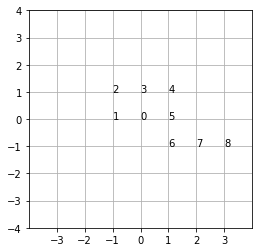

In [59]:
# show sequence
turns = 'lurrddrr'

coords = np.zeros((len(turns)+1,2), dtype=int)
coords[0] = [0,0]
for t,turn in enumerate(turns):
    coords[t+1] = coords[t] + move_dict[turn]

plt.figure(figsize=(4,4))
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xticks([-3,-2,-1,0,1,2,3])
plt.grid()
for c,coord in enumerate(coords):
    plt.annotate(s=c, xy=coord)

plt.show()

# Contact Energies
`mjh3`:
Miyazawa S, Jernigan RL. Self-consistent estimation of interresidue
protein contact energies based on an equilibrium mixture
approximation of residues. Proteins 1999;34:49-68.

Matrices from [LightDock](https://github.com/brianjimenez/lightdock/blob/6bdcb82bc16111bf8a0c9647cb90bc573fd471d8/lightdock/scoring/mj3h/data/MJ_potentials.dat)

In [16]:
d = {'LEU': 0,
     'PHE': 1,
     'ILE': 2,
     'MET': 3,
     'VAL': 4,
     'TRP': 5,
     'CYS': 6,
     'TYR': 7,
     'HIS': 8,
     'ALA': 9,
     'THR': 10,
     'GLY': 11,
     'PRO': 12,
     'ARG': 13,
     'GLN': 14,
     'SER': 15,
     'ASN': 16,
     'GLU': 17,
     'ASP': 18,
     'LYS': 19}

P = pd.read_csv('mat/mj3h.txt', delimiter=' ', header=None)
P.columns = d.keys()
P.index = d.keys()
P

,LEU,PHE,ILE,MET,VAL,TRP,CYS,TYR,HIS,ALA,THR,GLY,PRO,ARG,GLN,SER,ASN,GLU,ASP,LYS
LEU,-0.84,-0.80,-0.81,-0.70,-0.74,-0.62,-0.65,-0.55,-0.18,-0.38,-0.15,-0.16,-0.12,-0.04,-0.04,-0.02,0.04,0.17,0.27,0.22
PHE,-0.80,-0.88,-0.73,-0.83,-0.67,-0.68,-0.67,-0.58,-0.34,-0.36,-0.15,-0.19,-0.19,-0.05,-0.11,-0.12,-0.01,0.14,0.18,0.19
ILE,-0.81,-0.73,-0.74,-0.66,-0.67,-0.60,-0.64,-0.49,-0.13,-0.37,-0.15,-0.13,-0.05,0.00,-0.01,0.03,0.14,0.17,0.22,0.24
MET,-0.70,-0.83,-0.66,-0.70,-0.51,-0.73,-0.61,-0.56,-0.29,-0.27,-0.11,-0.17,-0.13,0.03,-0.06,0.05,0.04,0.12,0.30,0.29
VAL,-0.74,-0.67,-0.67,-0.51,-0.65,-0.51,-0.59,-0.38,-0.06,-0.32,-0.07,-0.15,-0.05,0.08,0.08,0.04,0.12,0.26,0.36,0.29
TRP,-0.62,-0.68,-0.60,-0.73,-0.51,-0.64,-0.66,-0.49,-0.37,-0.27,-0.02,-0.25,-0.37,-0.21,-0.02,-0.01,-0.10,0.00,0.07,0.09
CYS,-0.65,-0.67,-0.64,-0.61,-0.59,-0.66,-1.19,-0.39,-0.36,-0.33,-0.15,-0.31,-0.18,0.08,-0.07,-0.13,-0.01,0.20,0.12,0.33
TYR,-0.55,-0.58,-0.49,-0.56,-0.38,-0.49,-0.39,-0.45,-0.30,-0.20,-0.09,-0.22,-0.25,-0.25,-0.14,-0.08,-0.11,-0.08,-0.07,-0.05
HIS,-0.18,-0.34,-0.13,-0.29,-0.06,-0.37,-0.36,-0.30,-0.40,0.07,-0.03,0.00,0.01,0.05,0.15,0.04,0.00,0.00,-0.10,0.38
ALA,-0.38,-0.36,-0.37,-0.27,-0.32,-0.27,-0.33,-0.20,0.07,-0.12,0.04,-0.08,0.15,0.24,0.22,0.10,0.15,0.38,0.27,0.41


# Hamiltonians

### Cost
$H_C = H_{overlap} + H_{pair}$

$H_{overlap}(i,j) = \prod_{k=1}^{D} \prod_{r=1}^{log_2(j-i)} \text{XNOR}(s_k^r(i,j),s_\bar{k}^r(i,j))$

$H_{pair} = \sum_{i=1}^{n-3} \sum_{j=1}^{\frac{1}{2}(N-i-1)} P_{i,1+i+2j} \sum_{k=1}^{D} a_k(i,1+i+2j)$

$s_k^r$


where:

$D:$ num dimensions

$P_{i,i'}:$ interaction strength (HP, MJ, or other)

### Mixer
*Fingerhuth, et al* use several different mixer Hamiltonians. Here is $XY_{simple}$:

*Fingerhuth, et al* define a slightly unique $\texttt{SWAP}$ in eq. (12), which I will refer to as $\texttt{SWA}$

$\texttt{SWA}_{i,i'} = \frac{1}{2}(X_i X_{i'} + Y_i Y_{i'})$

$M_t = \sum_{i=0}^{n-2} \sum_{i'=i+1}^{n-1} SWA_{i,i'}$

$H_M = \sum_{i=1}^{N-2} M_t$





In [ ]:
def xnor(p,q):
    return 1-p-q+2*p*q

def adj(k,i,j):
    return 

In [ ]:
# hamiltonians

H_overlap = 
H_pair = 
Hc = H_overlap + H_pair

Hm = 

# Run

In [ ]:
# amino acids
seq = 'PSVK'